In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# https://www.kaggle.com/jmmvutu/eda-online-c2c-fashion-store-user-behaviour
# https://www.kaggle.com/kerneler/starter-e-commerce-users-of-a-french-4b0f4745-8/notebook
df = pd.read_csv('../dataset.csv')

In [3]:
df.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,-7279641312655250028,user,Etats-Unis,en,3,8,0,0,0,0.0,...,mrs,False,False,False,True,709,3205,106.83,8.9,us
1,-1456013578740053406,user,Allemagne,de,3,8,0,0,0,0.0,...,mrs,False,False,False,True,709,3205,106.83,8.9,de
2,9006282053848196165,user,Suède,en,3,8,0,0,0,0.0,...,mr,True,False,True,True,689,3205,106.83,8.9,se
3,-7154634866120535654,user,Turquie,en,3,8,0,0,0,0.0,...,mrs,False,False,False,True,709,3205,106.83,8.9,tr
4,2858299215060733023,user,France,en,3,8,0,0,0,0.0,...,mr,True,False,True,True,709,3205,106.83,8.9,fr


In [4]:
df[df['socialNbFollows']<8].describe()
# Note for Brian: There are 139 of 90k+ users who have ('socialNbFollows'<8). Only a very few outliers of those seem to be active users.
# => I think we could leave the subgroup out.

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,4.470508e+17,8.424460,3.913669,36.316547,1.366906,2.848921,12.266187,19.359712,3.287770,1.755396,256.964029,3078.532374,102.618058,8.551799
std,5.251901e+18,15.664498,2.964725,144.086832,6.024279,12.296408,31.514104,66.905082,13.522523,0.549594,252.938109,164.922261,5.497286,0.458111
min,-9.069299e+18,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,2852.000000,95.070000,7.920000
25%,-4.070444e+18,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,23.500000,2858.000000,95.270000,7.940000
50%,6.331368e+17,4.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,190.000000,3197.000000,106.570000,8.880000
75%,5.188139e+18,5.500000,7.000000,14.000000,0.000000,1.000000,0.000000,5.000000,1.000000,2.000000,506.500000,3201.000000,106.700000,8.890000
max,9.101213e+18,121.000000,7.000000,1140.000000,54.000000,108.000000,100.000000,531.000000,105.000000,3.000000,704.000000,3205.000000,106.830000,8.900000


In [5]:
# active users = prospective buyers or prospective sellers or active social users
# prospective buyers: those who interacting with products of others with a like/wishlist/purchase
# prospective sellers: those who are having at least one product for sale or listed
# active social users: those who are interacting with other users by following accounts (in the dataset the baseline socialNbFollows appears to be 8 and not 0)

df_active= df.loc[(df["productsListed"] !=0)|(df["productsSold"] !=0)|(df["productsWished"]!=0)|(df["productsBought"]!=0)|(df["socialProductsLiked"]!=0)|(df["socialNbFollows"]>8)]
df_active.shape

(22288, 24)

In [6]:
# Segmenting the users into 4 subgroups:
# 1. exclusive buyers: those who have bought at least 1 product but haven't sold anything
# 2. exclusive sellers: those who have sold at least 1 product but haven't bought anything
# 3. both buyers and sellers: those who have bought at least 1 product and sold at least 1 product
# 4. prospective users: those who haven't bought and sold anything but who are actively interacting with other accounts

In [7]:
# 1st Segment: exclusive buyers: those who have bought at least 1 product
df_exclusive_buyers = (df_active
                       .loc[(df['productsSold'] == 0) & (df['productsBought'] != 0)]
                       .assign(user_type='exclusive_buyer'))
df_exclusive_buyers.describe()
# The descibe function provides us with key information concerning this segment:
# 4857 active users are exclusive buyers who buy in average 2.5 products (Median=1, IQR= 2). => Most exclusive buyers are small buyers.

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
count,4.857000e+03,4857.000000,4857.000000,4857.000000,4857.000000,4857.0,4857.0,4857.000000,4857.000000,4857.000000,4857.000000,4857.000000,4857.000000,4857.000000
mean,-6.787677e+16,4.651637,8.928557,33.405806,0.051884,0.0,0.0,15.280008,2.478896,1.729669,313.204653,3068.391806,102.279638,8.523212
std,5.312927e+18,3.600481,8.110722,269.345065,0.445767,0.0,0.0,81.531676,4.577632,0.459670,272.887611,167.251170,5.574870,0.464897
min,-9.219834e+18,3.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,11.000000,2852.000000,95.070000,7.920000
25%,-4.595531e+18,3.000000,8.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,31.000000,2857.000000,95.230000,7.940000
50%,-5.360249e+16,4.000000,8.000000,1.000000,0.000000,0.0,0.0,0.000000,1.000000,2.000000,249.000000,3197.000000,106.570000,8.880000
75%,4.475140e+18,5.000000,8.000000,12.000000,0.000000,0.0,0.0,4.000000,2.000000,2.000000,628.000000,3201.000000,106.700000,8.890000
max,9.221188e+18,57.000000,482.000000,16040.000000,12.000000,0.0,0.0,2635.000000,93.000000,3.000000,709.000000,3205.000000,106.830000,8.900000


In [8]:
# 2nd Segment: exclusive sellers: those who have bought at least 1 product
df_exclusive_sellers = (df_active
                        .loc[(df['productsSold'] != 0) & (df['productsBought'] == 0)]
                        .assign(user_type='exclusive_seller'))
df_exclusive_sellers.describe()
# The descibe function provides us with key information concerning this segment:
# 1474 active users are exclusive sellers who buy in average 5.6 products (Median=2, IQR=3). => Most exclusive sellers are small sellers.

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
count,1.474000e+03,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.0,1474.000000,1474.000000,1474.00000,1474.000000,1474.000000
mean,4.261365e+16,11.329715,29.096336,56.278155,3.609905,5.581411,37.834057,3.849389,0.0,1.824966,230.961330,3061.93555,102.064328,8.505488
std,5.324734e+18,26.642000,431.964384,1367.880067,12.060120,12.909017,44.462528,56.764258,0.0,0.534512,238.738821,168.84189,5.627837,0.469363
min,-9.221801e+18,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,11.000000,2852.00000,95.070000,7.920000
25%,-4.534347e+18,4.000000,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,2.000000,17.000000,2857.00000,95.230000,7.940000
50%,1.995009e+16,6.000000,8.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.0,2.000000,125.000000,3196.00000,106.530000,8.880000
75%,4.568205e+18,10.000000,8.000000,4.000000,3.000000,4.000000,90.000000,0.000000,0.0,2.000000,418.000000,3201.00000,106.700000,8.890000
max,9.204738e+18,744.000000,13764.000000,51671.000000,217.000000,170.000000,100.000000,1842.000000,0.0,3.000000,709.000000,3205.00000,106.830000,8.900000


In [9]:
# 3rd Segment: both buyers and sellers: those who have bought at least 1 product and sold at least 1 product
df_buyers_sellers = (df_active
                     .loc[(df['productsSold'] != 0) & (df['productsBought'] != 0)]
                     .assign(user_type='buyer_and_seller'))
df_buyers_sellers.describe()
# The descibe function provides us with key information concerning this segment:
# 562 active users are both buyers and sellers with both higher average and mean values for the number of products sold and bought. 
# => This segment seems to be the most active and the platform: the behaviour of these users deserves to be looked into more thoroughly.

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
count,5.620000e+02,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000
mean,3.286952e+17,13.209964,12.604982,107.256228,4.927046,6.761566,43.736477,56.179715,8.836299,1.832740,85.104982,3068.361210,102.278470,8.523167
std,5.214071e+18,16.317987,23.445021,407.349454,17.147364,15.329538,44.582841,179.375481,25.523710,0.496472,147.735870,167.623175,5.587301,0.465811
min,-9.211565e+18,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,11.000000,2852.000000,95.070000,7.920000
25%,-4.258622e+18,5.000000,8.000000,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,11.000000,2857.000000,95.230000,7.940000
50%,7.869879e+17,8.000000,8.000000,18.000000,1.000000,2.000000,40.800000,5.000000,3.000000,2.000000,17.000000,3197.000000,106.570000,8.880000
75%,4.530167e+18,14.000000,10.000000,74.750000,3.000000,6.000000,93.000000,25.000000,7.000000,2.000000,67.750000,3201.000000,106.700000,8.890000
max,9.187045e+18,147.000000,450.000000,5979.000000,244.000000,174.000000,100.000000,1916.000000,405.000000,3.000000,696.000000,3205.000000,106.830000,8.900000


In [10]:
# 4th Segment: exclusive social users: those who haven't bought and sold anything but who are actively interacting with other accounts
df_prospective_users = (df_active
                        .loc[(df['productsSold'] == 0) & (df['productsBought'] == 0)]
                        .assign(user_type='prospective_user'))
df_prospective_users.describe()

# The descibe function provides us with key information concerning this segment:
# 15395 active users are prospective users: they haven't bought and sold anything yet but have either products listed for sell or have actively interacted with other accounts. 

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
count,1.539500e+04,15395.000000,15395.000000,15395.000000,15395.000000,15395.0,15395.0,15395.000000,15395.0,15395.000000,15395.000000,15395.000000,15395.000000,15395.000000
mean,4.773451e+16,3.538097,8.259760,8.560247,0.057616,0.0,0.0,2.799545,0.0,1.842027,439.331601,3061.660214,102.055186,8.504572
std,5.341006e+18,1.944908,1.371024,39.732231,0.478313,0.0,0.0,17.826188,0.0,0.386182,258.107789,168.745667,5.624636,0.469097
min,-9.223101e+18,3.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,11.000000,2852.000000,95.070000,7.920000
25%,-4.543043e+18,3.000000,8.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,2.000000,191.000000,2857.000000,95.230000,7.940000
50%,7.042313e+16,3.000000,8.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,2.000000,531.000000,3196.000000,106.530000,8.880000
75%,4.691885e+18,3.000000,8.000000,5.000000,0.000000,0.0,0.0,1.000000,0.0,2.000000,693.000000,3201.000000,106.700000,8.890000
max,9.223331e+18,36.000000,77.000000,1590.000000,25.000000,0.0,0.0,1225.000000,0.0,3.000000,709.000000,3205.000000,106.830000,8.900000


In [11]:
# Reseting the dataframe for active users (now with a new column 'user_type')
user_segment = [df_exclusive_buyers, df_exclusive_sellers, df_buyers_sellers, df_prospective_users]
df_active = pd.concat(user_segment)
df_active.shape

(22288, 25)

In [12]:
df_active

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode,user_type
51,-6589093921826008799,user,Etats-Unis,en,3,9,1,0,0,0.0,...,False,False,False,True,26,3205,106.83,8.9,us,exclusive_buyer
85,-937288556484695351,user,Suède,en,5,8,0,0,0,0.0,...,False,False,False,True,543,3205,106.83,8.9,se,exclusive_buyer
95,7144186809315241123,user,Canada,en,4,10,1,0,0,0.0,...,True,True,False,True,208,3205,106.83,8.9,ca,exclusive_buyer
102,4994268169579335625,user,Royaume-Uni,en,3,8,0,0,0,0.0,...,False,False,False,True,27,3205,106.83,8.9,gb,exclusive_buyer
114,4907046938384800140,user,Etats-Unis,en,28,29,0,0,0,0.0,...,True,False,True,False,15,3205,106.83,8.9,us,exclusive_buyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98883,4686499517041021923,user,Etats-Unis,en,7,9,0,0,0,0.0,...,False,False,False,True,708,3204,106.80,8.9,us,prospective_user
98889,4508710134224075356,user,France,fr,3,8,1,0,0,0.0,...,False,False,False,True,477,3204,106.80,8.9,fr,prospective_user
98896,4715935376764926056,user,Allemagne,en,3,8,10,0,0,0.0,...,True,False,True,True,15,3204,106.80,8.9,de,prospective_user
98901,7257878909040060228,user,Espagne,es,3,8,31,0,0,0.0,...,False,False,False,True,13,3204,106.80,8.9,es,prospective_user


In [13]:
df_active = df_active.assign(OS=np.where((df_active["hasAndroidApp"]&df_active["hasIosApp"]==True),"Both Apps",(np.where((df_active["hasAndroidApp"]==True),"Android",(np.where((df_active["hasIosApp"]==True),"iOS","Browser"))))))

In [14]:
df_active = df_active.assign(ratioBuySell=df_active["productsBought"]/df_active["productsSold"])


In [15]:
# df_active.to_csv("df_active.csv")

In [61]:
# Create a DataFrame with all active buyers
buyers = [df_exclusive_buyers, df_buyers_sellers]
df_buyers = pd.concat(buyers)[['identifierHash', 'user_type','productsBought']]
df_buyers = df_buyers[df_buyers['productsBought'] > 0].assign(productsBought_range=pd.NA)
df_buyers.loc[df_buyers['productsBought'].between(1,4, inclusive=True), 'productsBought_range'] = "1-4"
df_buyers.loc[df_buyers['productsBought'].between(5,10, inclusive=True), 'productsBought_range'] = "5-10"
df_buyers.loc[df_buyers['productsBought'].between(11,20, inclusive=True), 'productsBought_range'] = "11-20"
df_buyers.loc[df_buyers['productsBought'].between(21,30, inclusive=True), 'productsBought_range'] = "21-30"
df_buyers.loc[df_buyers['productsBought'].gt(31), 'productsBought_range'] = "31+"
df_buyers

,identifierHash,user_type,productsBought,productsBought_range
51,-6589093921826008799,exclusive_buyer,1,1-4
85,-937288556484695351,exclusive_buyer,1,1-4
95,7144186809315241123,exclusive_buyer,1,1-4
102,4994268169579335625,exclusive_buyer,2,1-4
114,4907046938384800140,exclusive_buyer,6,5-10
...,...,...,...,...
98260,-5414959342816599813,buyer_and_seller,1,1-4
98352,-1780456174896106635,buyer_and_seller,1,1-4
98368,1844013789737284769,buyer_and_seller,17,11-20
98442,3179447064315962304,buyer_and_seller,1,1-4


In [56]:
# Create a DataFrame with all active sellers
sellers = [df_exclusive_sellers, df_buyers_sellers]
df_sellers = pd.concat(sellers)[['identifierHash', 'user_type', 'productsSold']]
df_sellers = df_sellers[df_sellers['productsSold'] > 0].assign(productsSold_range=pd.NA)
df_sellers.loc[df_sellers['productsSold'].between(1,4, inclusive=True), 'productsSold_range'] = "1-4"
df_sellers.loc[df_sellers['productsSold'].between(5,10, inclusive=True), 'productsSold_range'] = "5-10"
df_sellers.loc[df_sellers['productsSold'].between(11,20, inclusive=True), 'productsSold_range'] = "11-20"
df_sellers.loc[df_sellers['productsSold'].between(21,30, inclusive=True), 'productsSold_range'] = "21-30"
df_sellers.loc[df_sellers['productsSold'].gt(31), 'productsSold_range'] = "31+"
df_sellers

,identifierHash,user_type,productsSold,productsSold_range
133,-4975676516338518373,exclusive_seller,1,1-4
164,-5922910413286749505,exclusive_seller,3,1-4
242,2070806682096194894,exclusive_seller,1,1-4
614,1675020017057075308,exclusive_seller,3,1-4
1084,-5427472487749231410,exclusive_seller,2,1-4
...,...,...,...,...
98260,-5414959342816599813,buyer_and_seller,20,11-20
98352,-1780456174896106635,buyer_and_seller,2,1-4
98368,1844013789737284769,buyer_and_seller,2,1-4
98442,3179447064315962304,buyer_and_seller,1,1-4


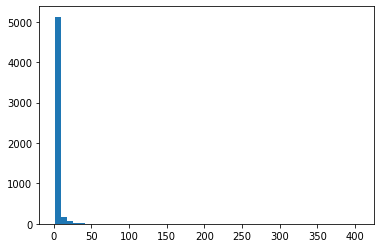

In [62]:
plt.hist(df_buyers['productsBought'], bins = 50)
plt.show()

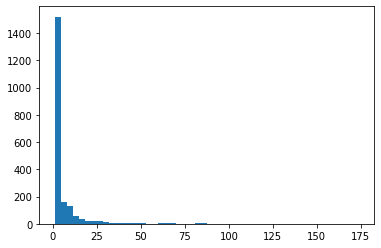

In [64]:
plt.hist(df_sellers['productsSold'], bins = 50)
plt.show()